In [154]:
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv('plates_no_features.csv')

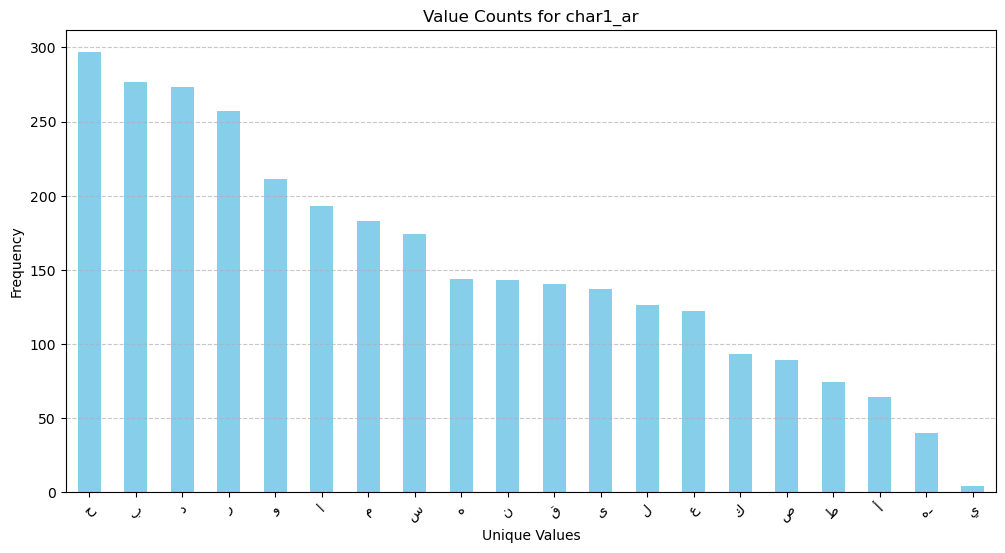

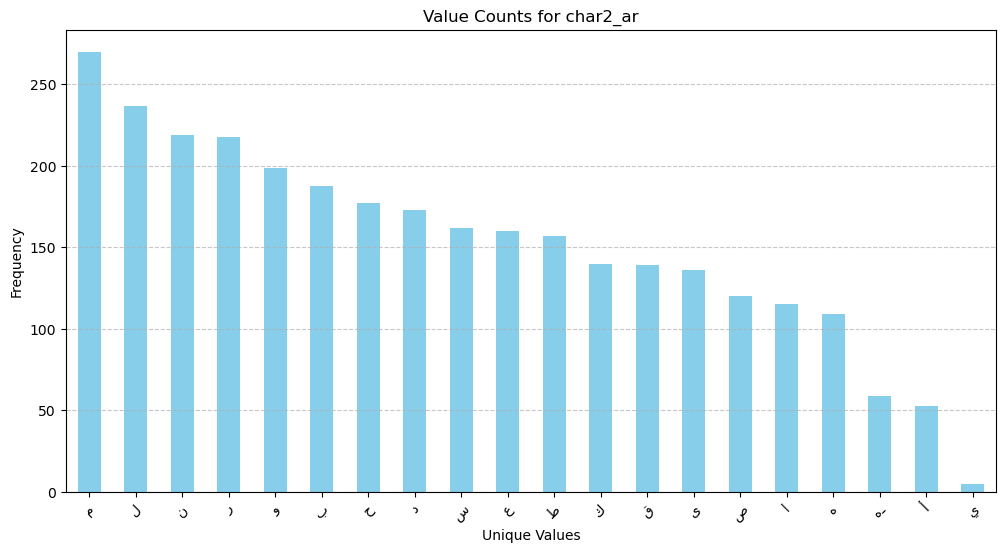

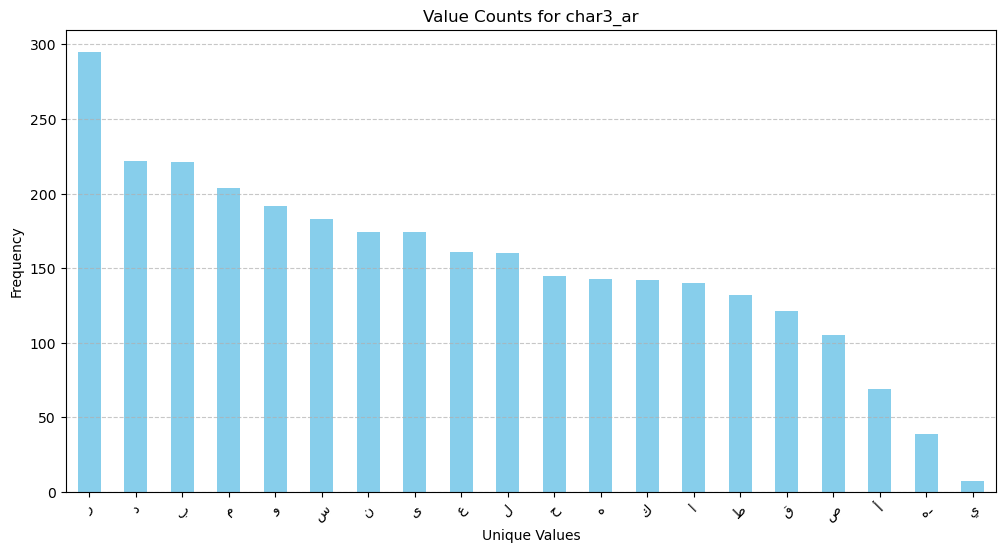

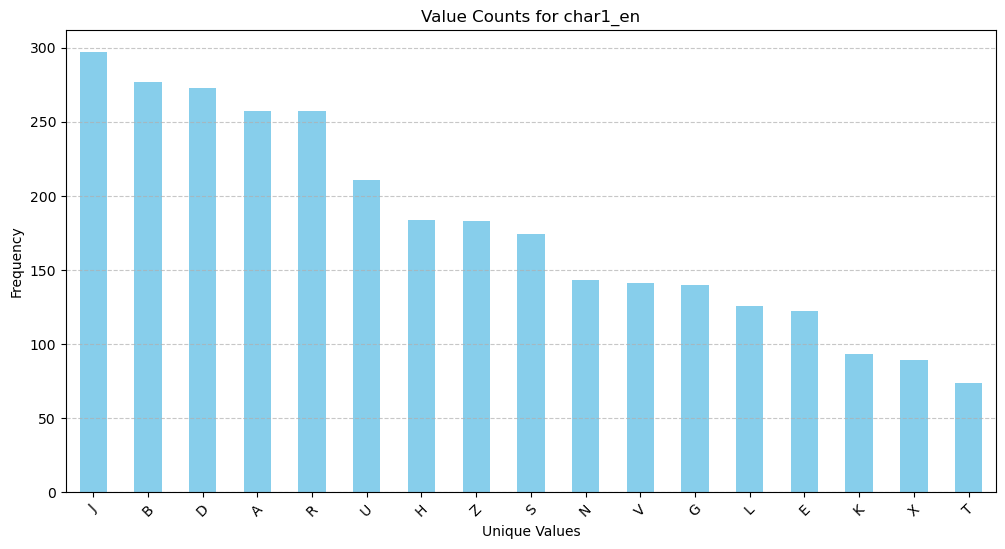

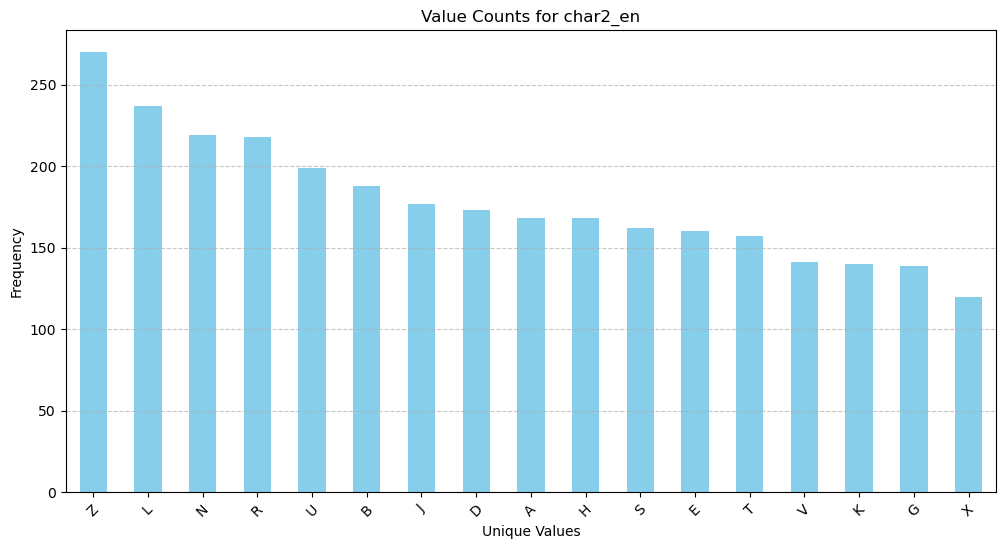

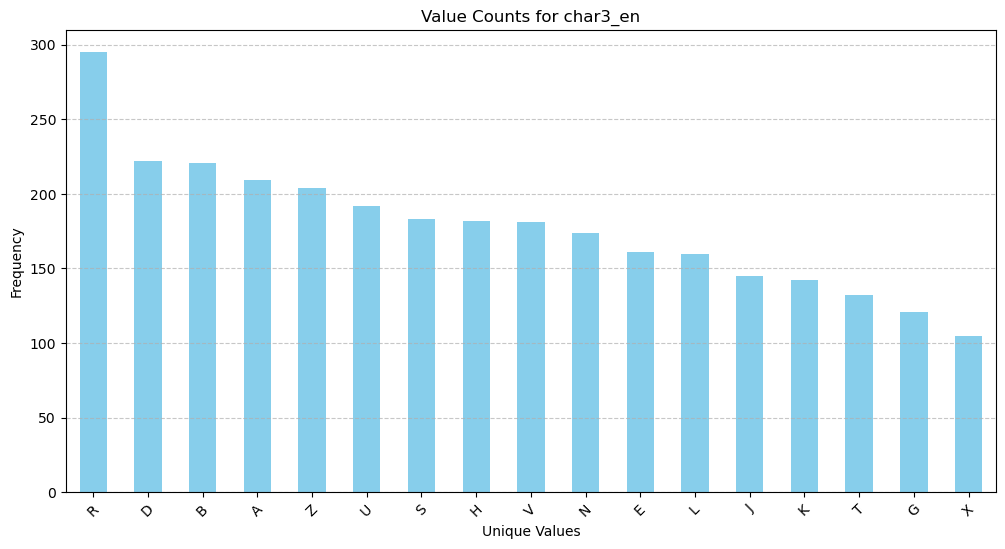

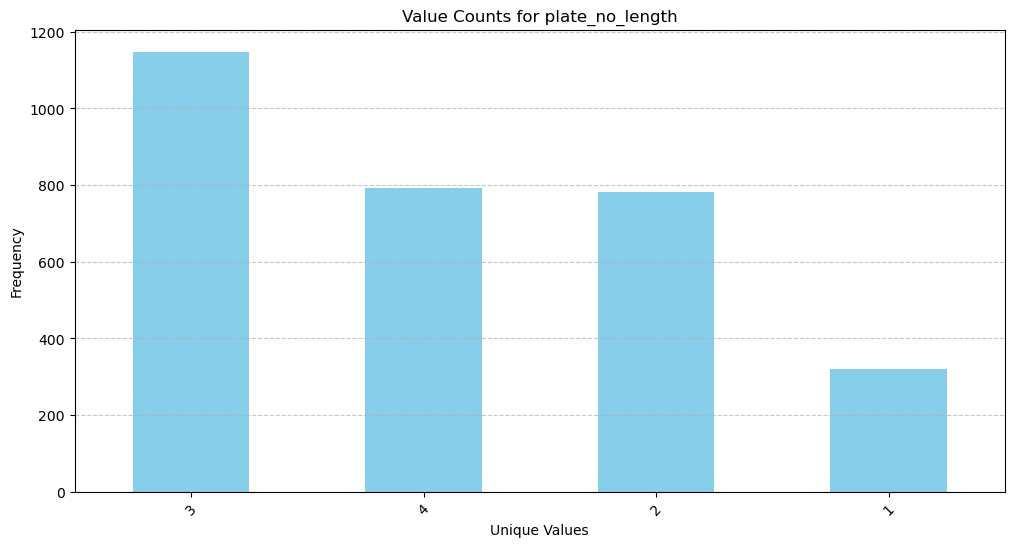

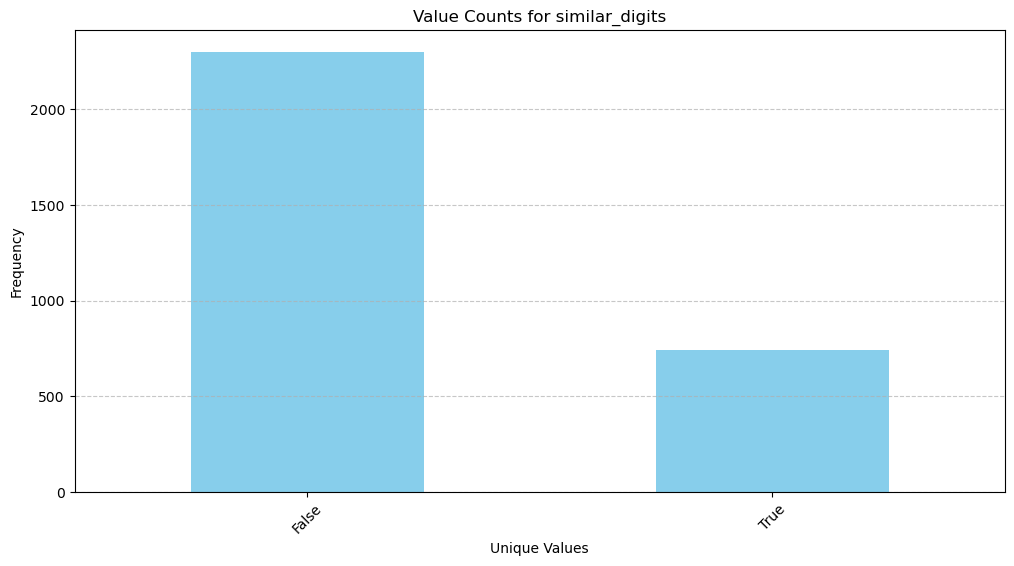

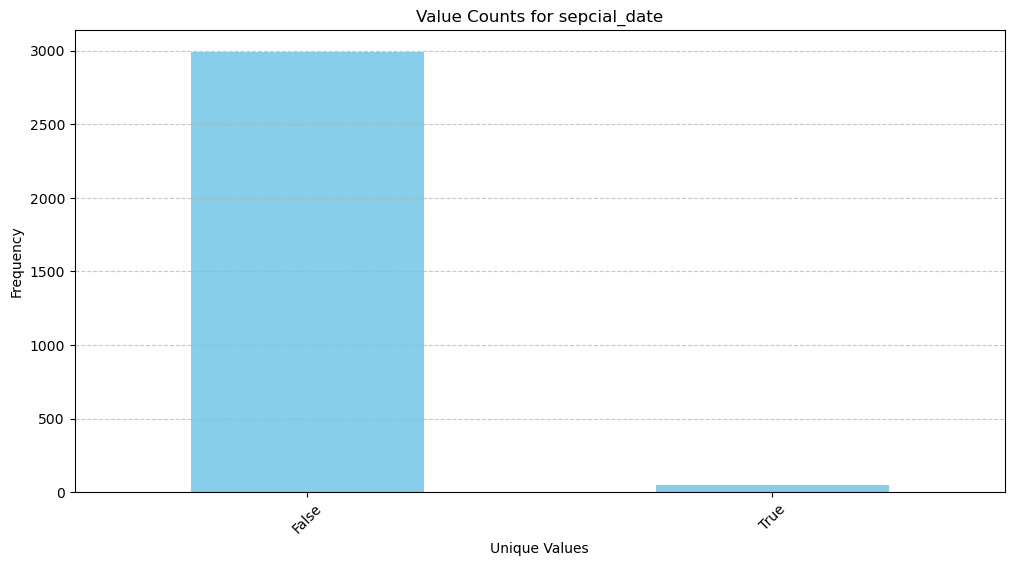

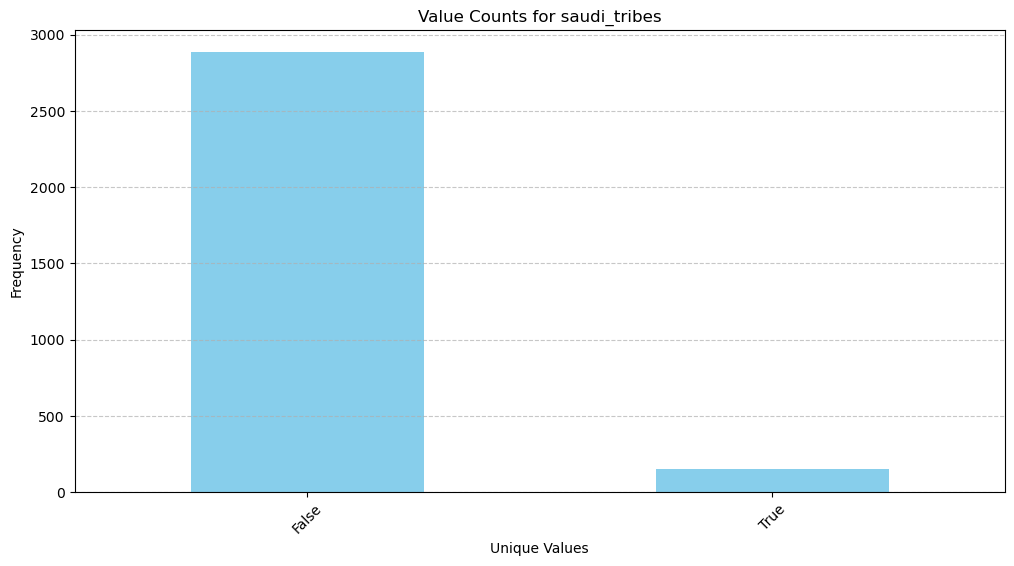

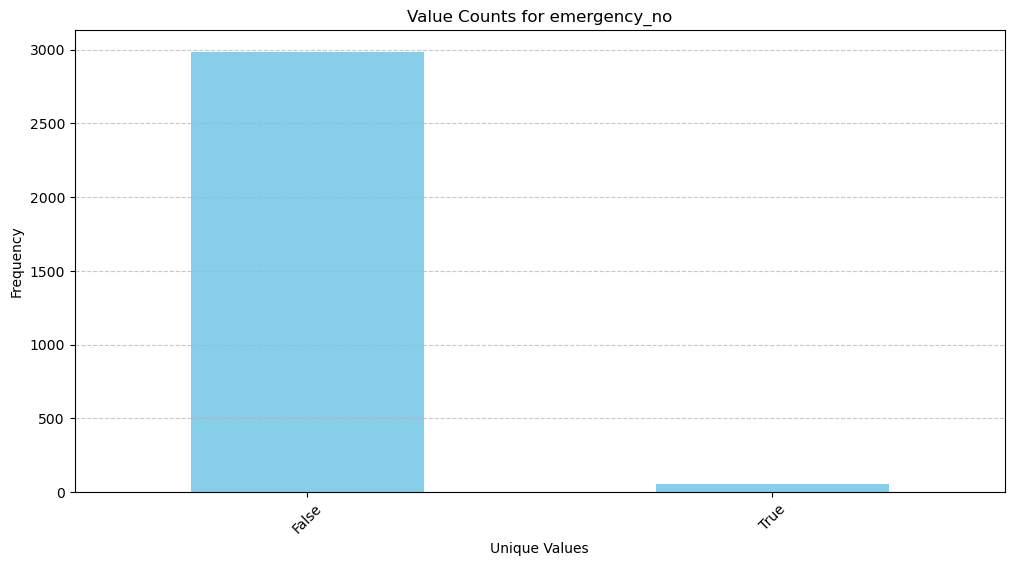

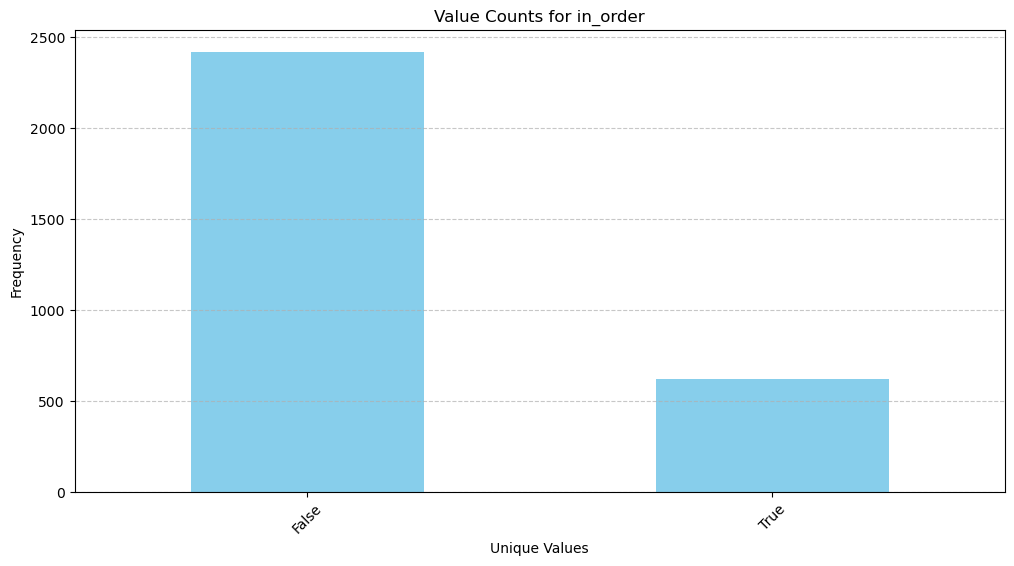

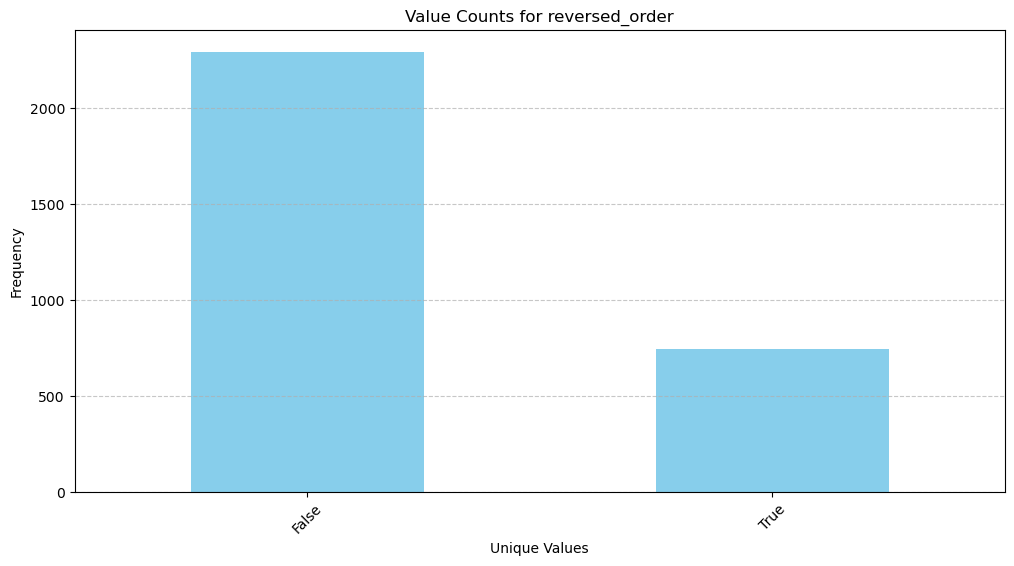

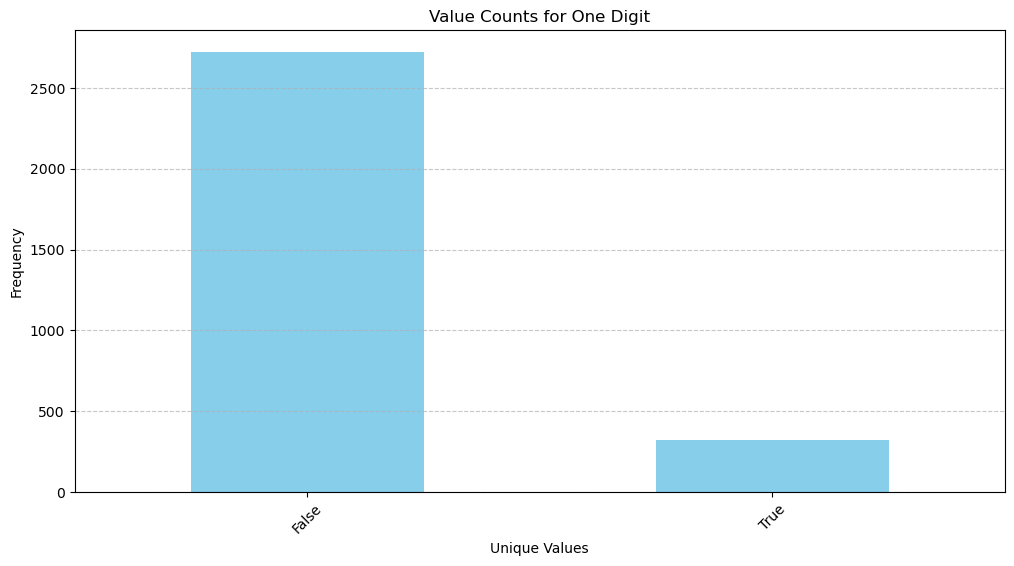

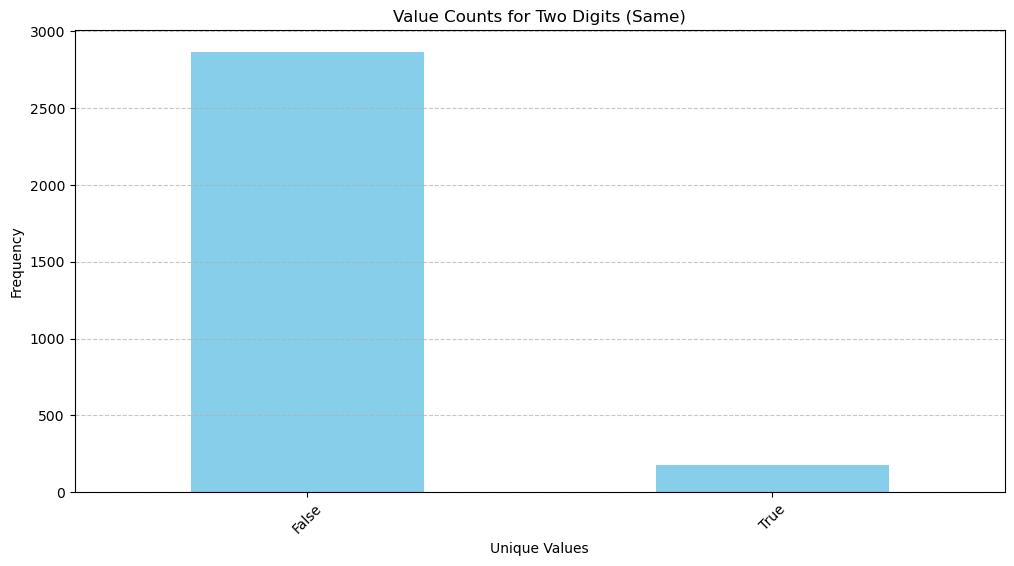

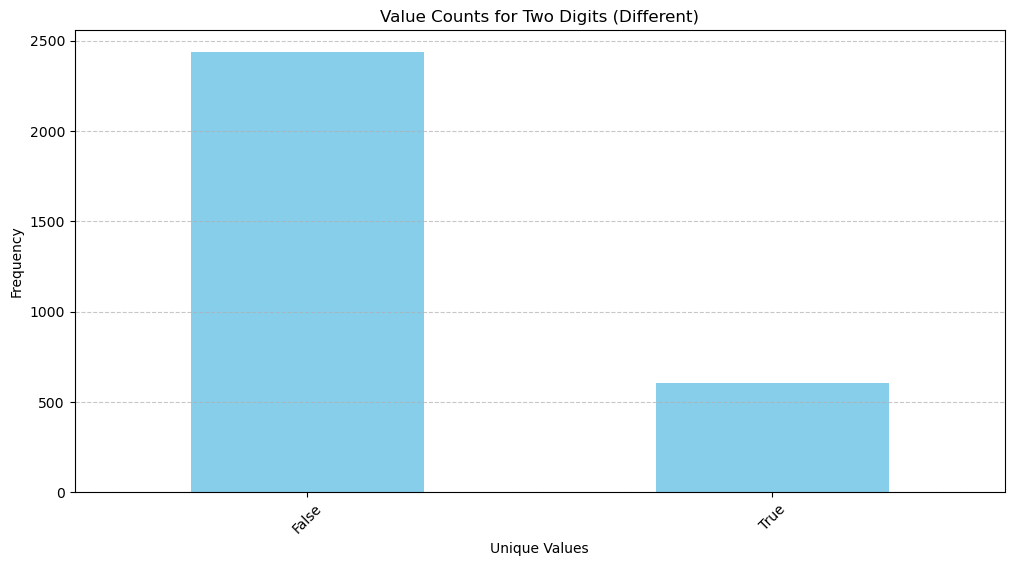

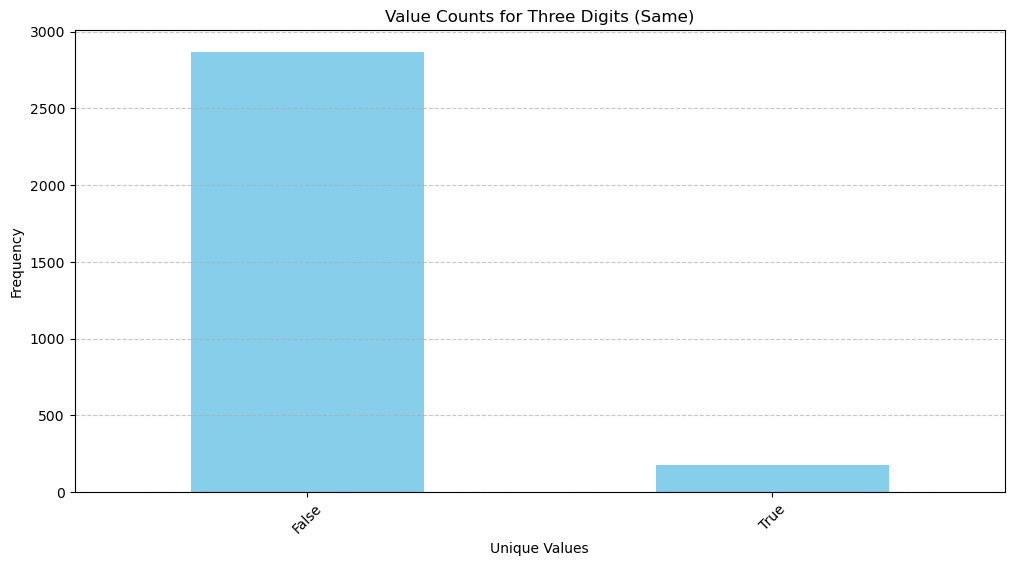

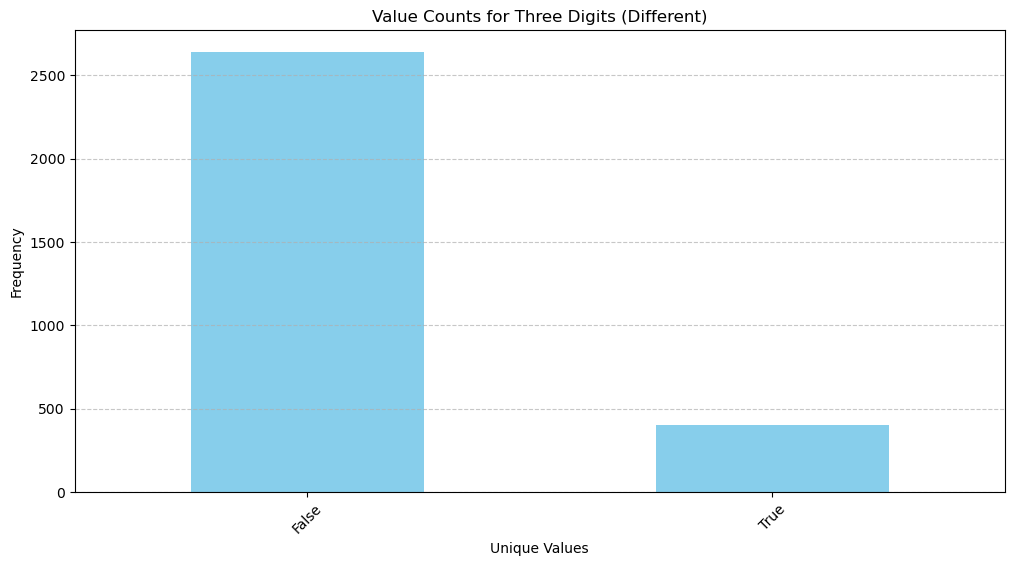

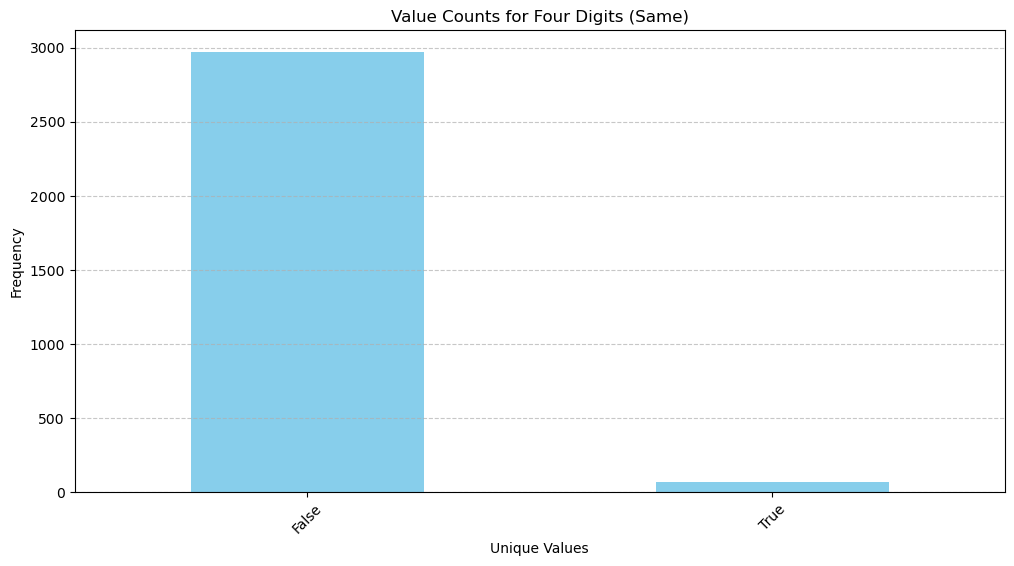

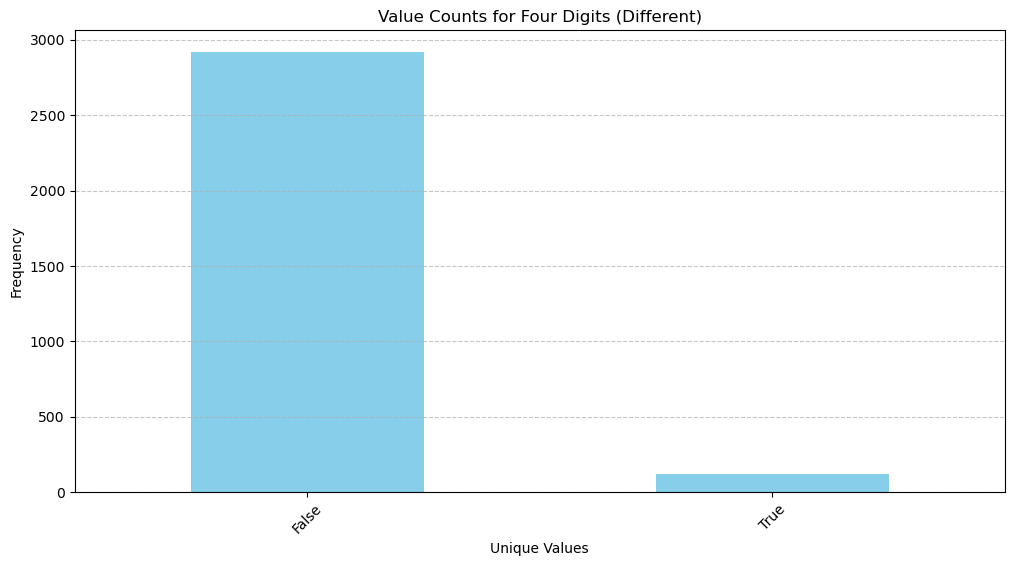

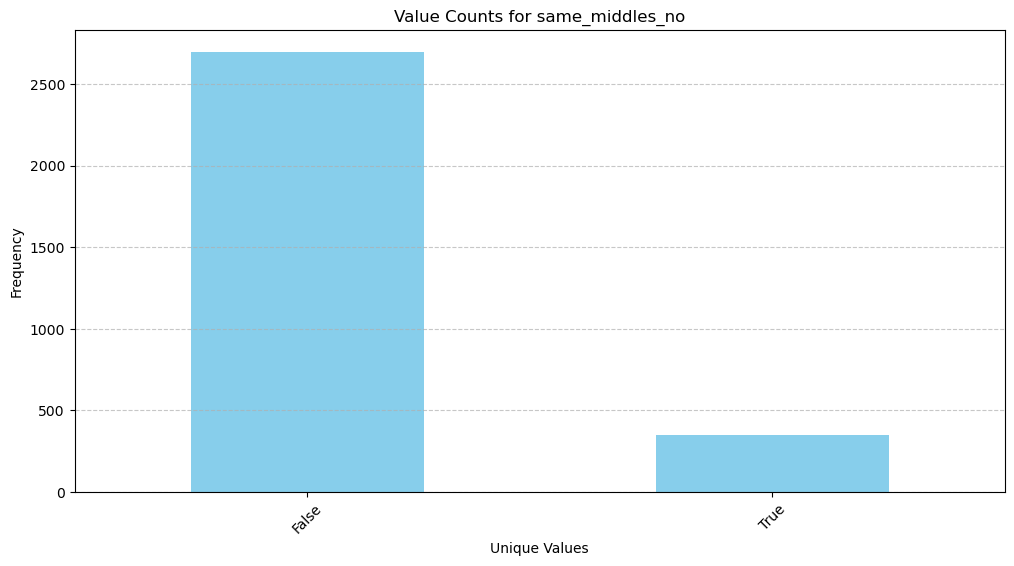

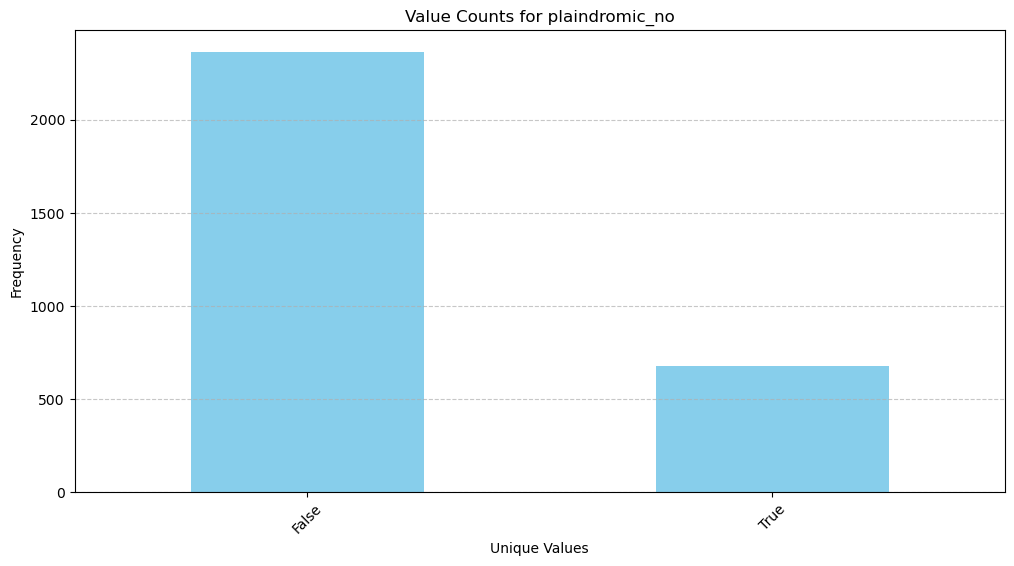

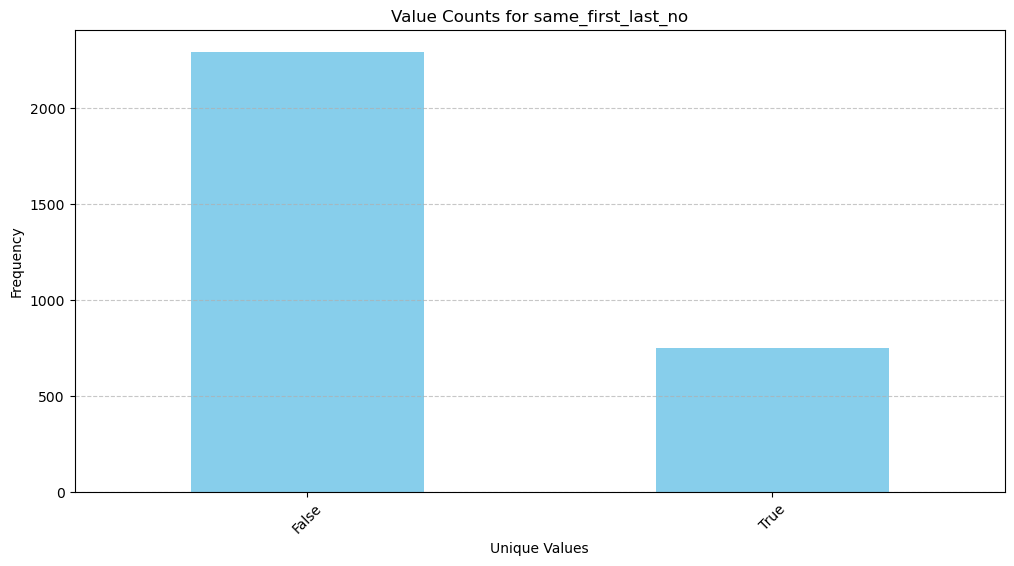

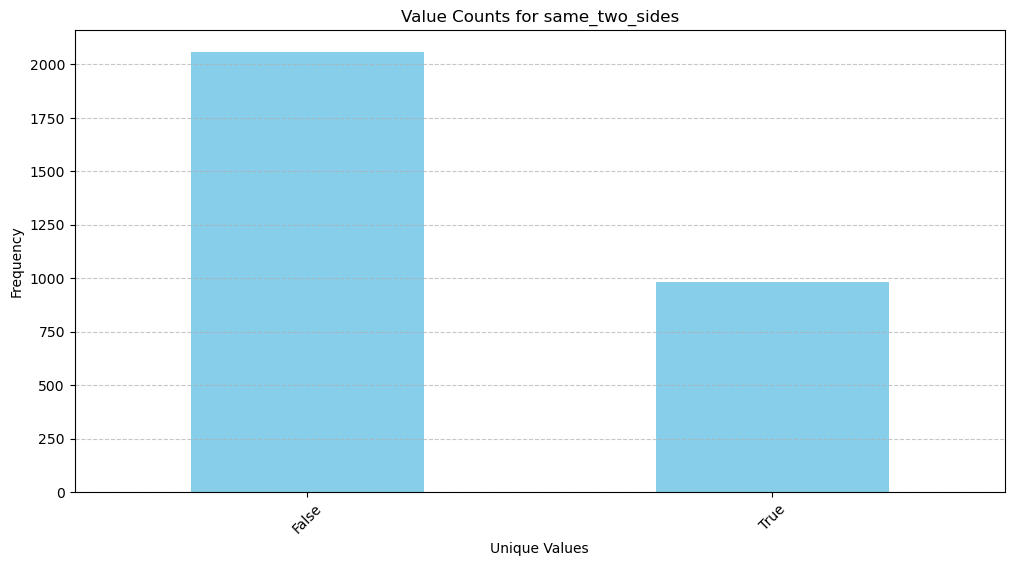

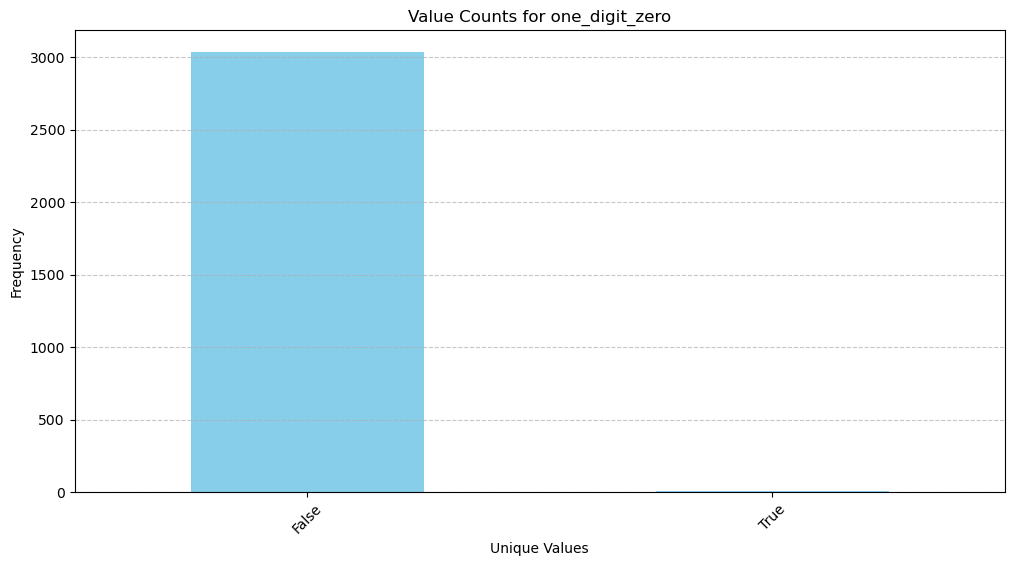

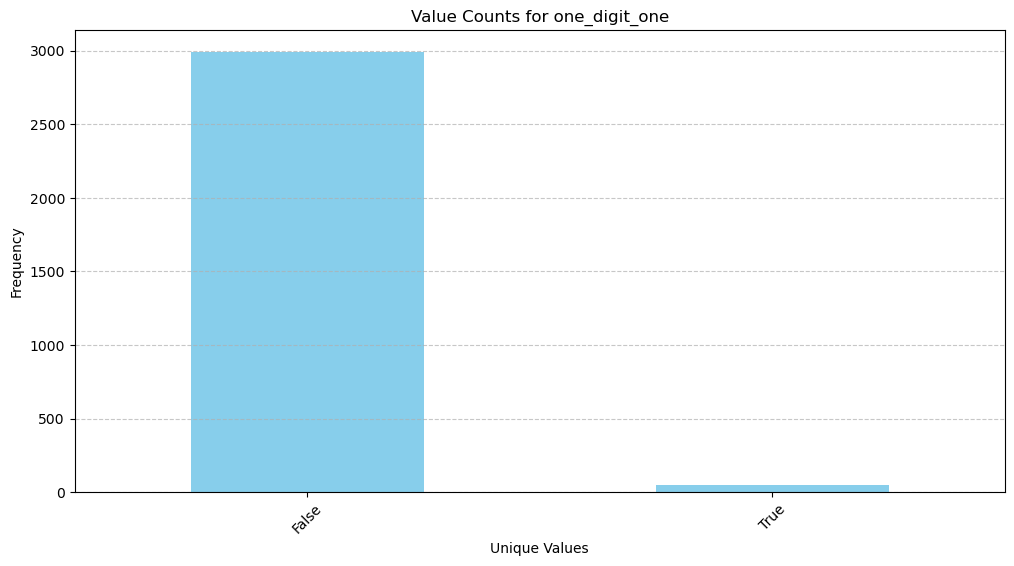

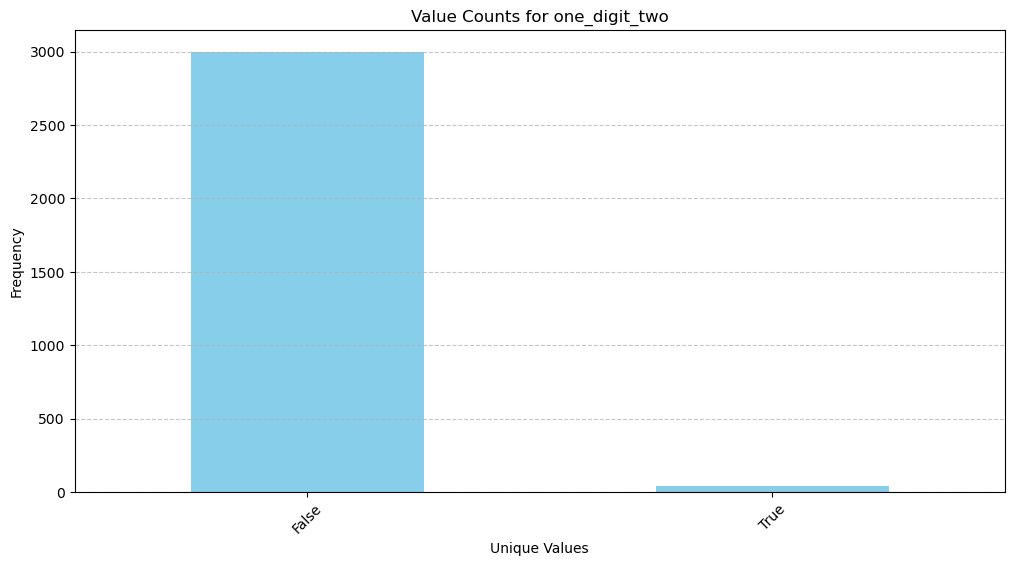

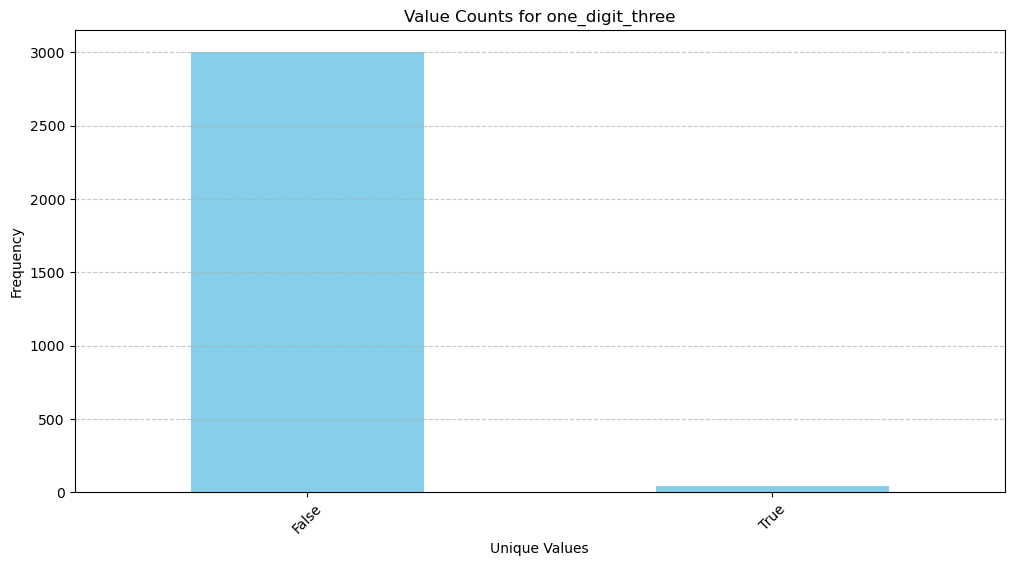

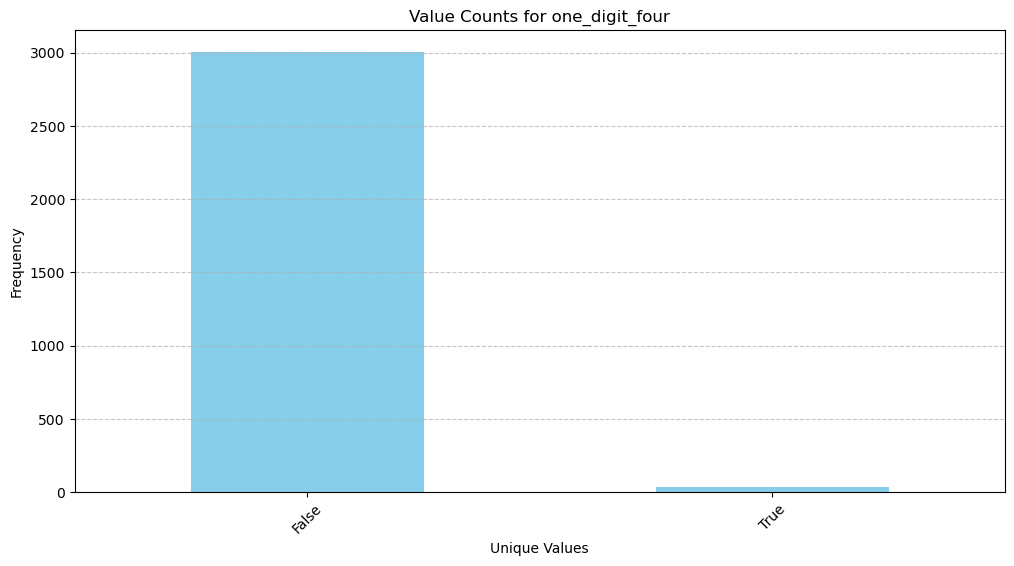

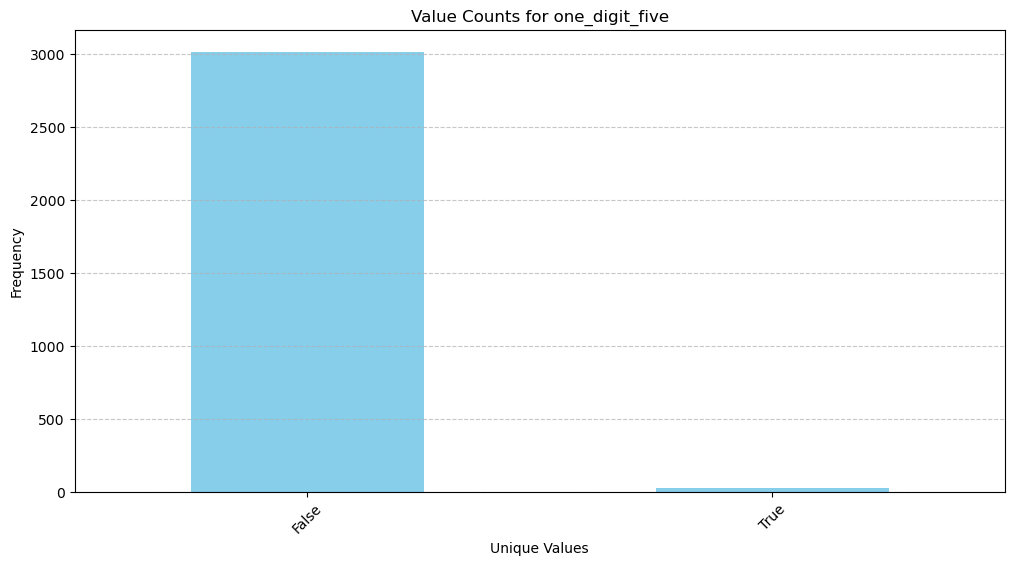

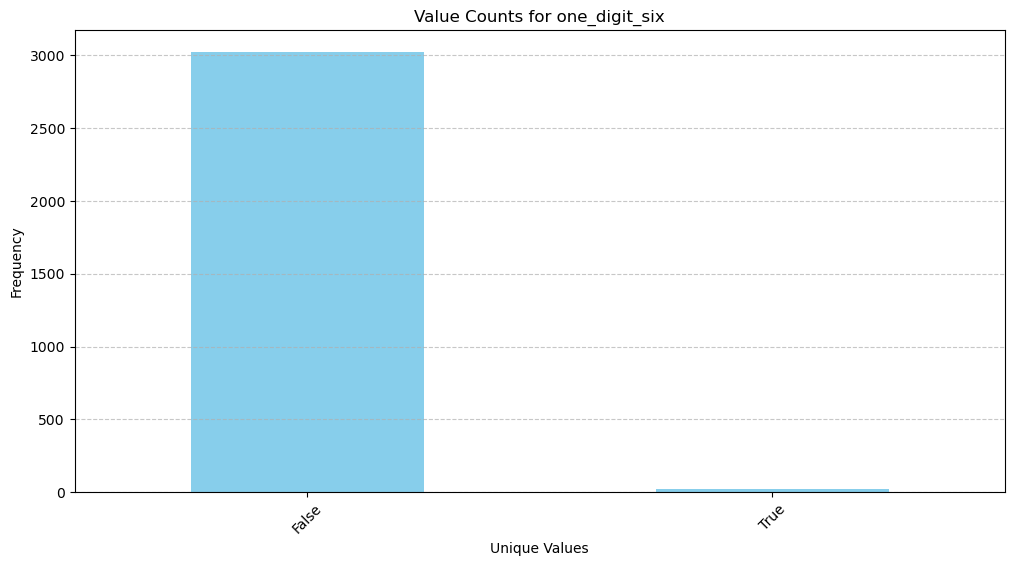

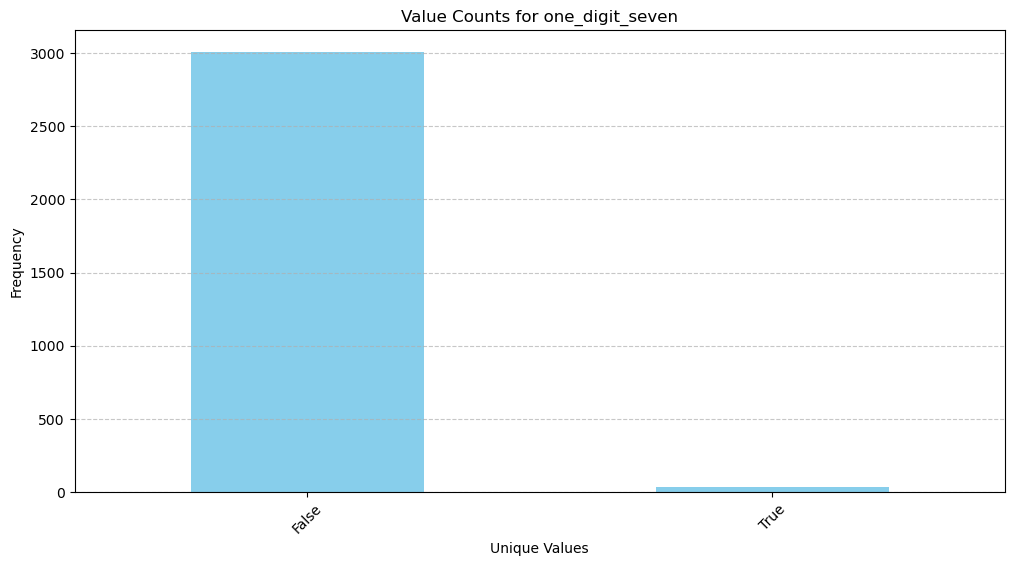

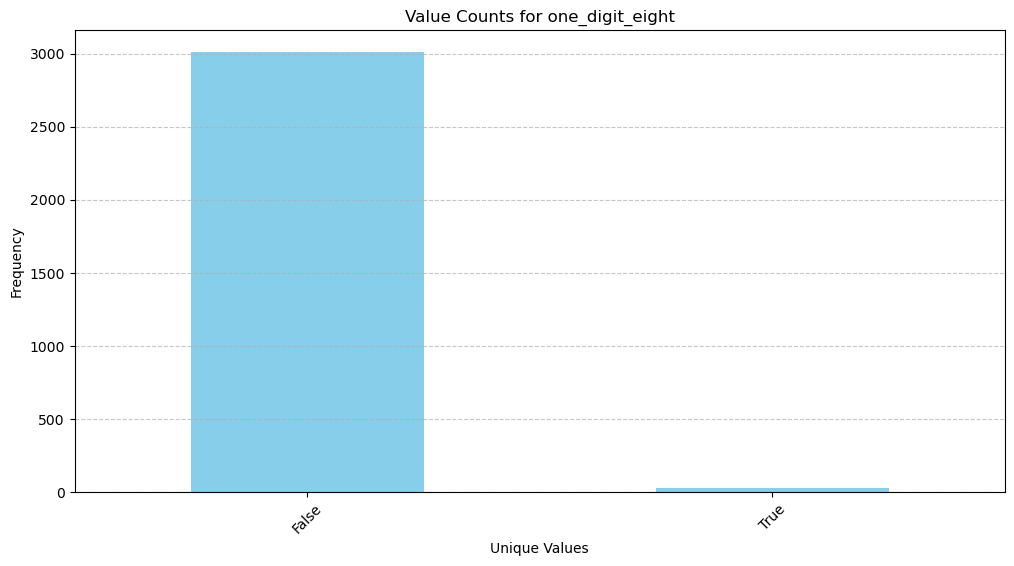

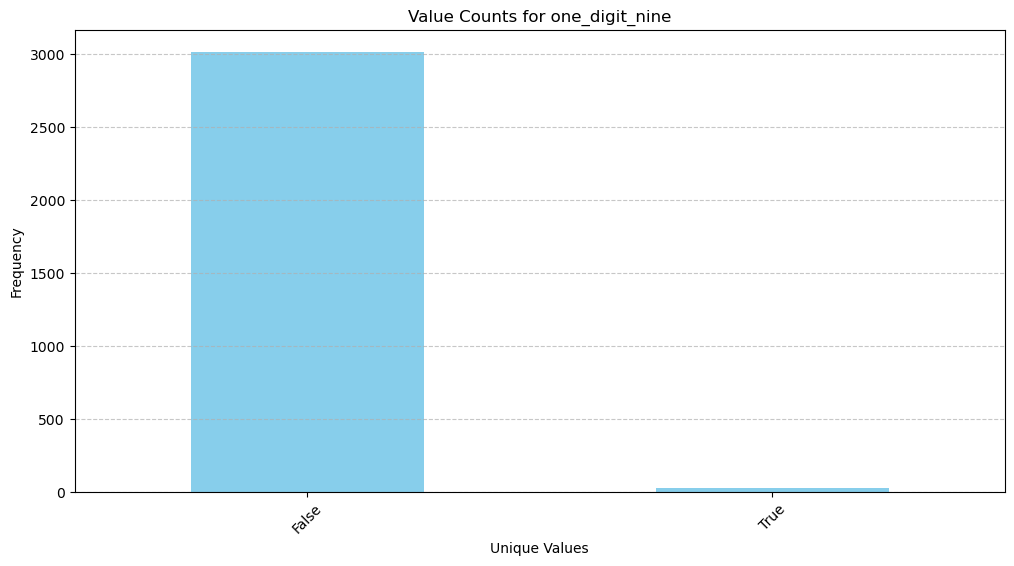

In [158]:
exclude_columns = ['char_ar', 'char_en', 'plate_no','price','rank','popularity']

for column in df.columns:
    if column not in exclude_columns: 
        plt.figure(figsize=(12, 6))
        df[column].value_counts().plot(kind='bar', color='skyblue')
        plt.xlabel('Unique Values')
        plt.ylabel('Frequency')
        plt.title(f'Value Counts for {column}')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


In [159]:
bool_columns = df.select_dtypes(include=['bool']).columns

results = {}

for col in bool_columns:
    true_count = (df[col] == 1).sum()
    false_count = (df[col] == 0).sum()
    results[col] = {'True (1)': true_count, 'False (0)': false_count}

bool_counts_df = pd.DataFrame.from_dict(results, orient='index')
print(bool_counts_df)

                          True (1)  False (0)
similar_digits                 743       2298
sepcial_date                    51       2990
saudi_tribes                   155       2886
emergency_no                    58       2983
in_order                       624       2417
reversed_order                 748       2293
One Digit                      320       2721
Two Digits (Same)              177       2864
Two Digits (Different)         604       2437
Three Digits (Same)            175       2866
Three Digits (Different)       402       2639
Four Digits (Same)              71       2970
Four Digits (Different)        123       2918
same_middles_no                347       2694
plaindromic_no                 678       2363
same_first_last_no             751       2290
same_two_sides                 984       2057
one_digit_zero                   7       3034
one_digit_one                   51       2990
one_digit_two                   45       2996
one_digit_three                 40

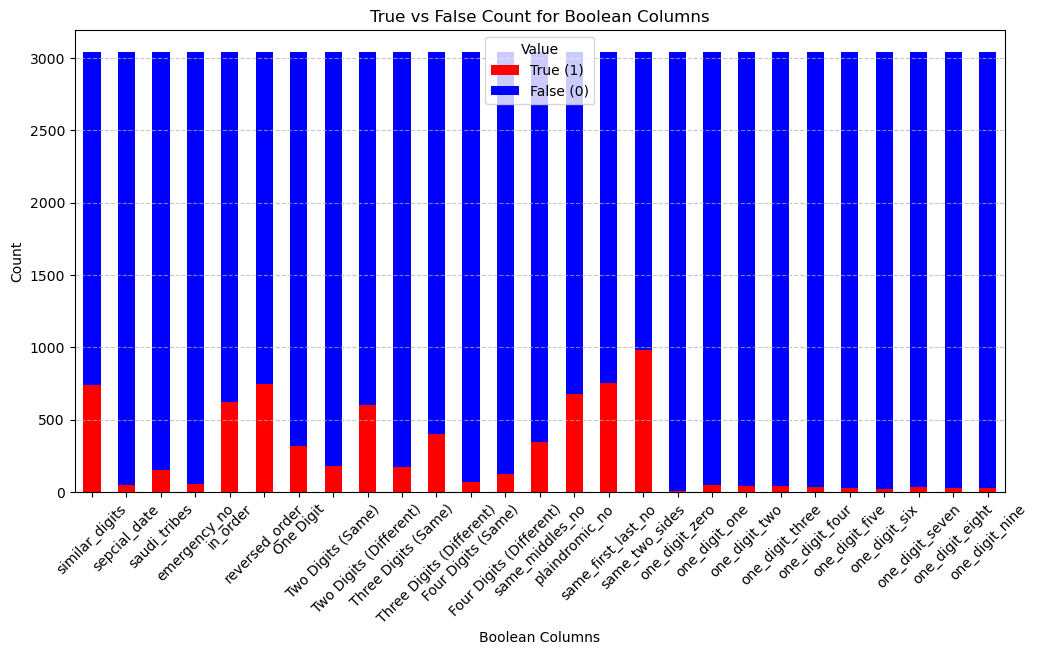

In [5]:

bool_counts_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'blue'])
plt.xlabel('Boolean Columns')
plt.ylabel('Count')
plt.title('True vs False Count for Boolean Columns')
plt.xticks(rotation=45)
plt.legend(title='Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
df.columns

Index(['char_ar', 'char_en', 'char1_ar', 'char2_ar', 'char3_ar', 'char1_en',
       'char2_en', 'char3_en', 'plate_no', 'price', 'rank', 'popularity',
       'plate_no_length', 'similar_digits', 'sepcial_date', 'saudi_tribes',
       'emergency_no', 'in_order', 'reversed_order', 'One Digit',
       'Two Digits (Same)', 'Two Digits (Different)', 'Three Digits (Same)',
       'Three Digits (Different)', 'Four Digits (Same)',
       'Four Digits (Different)', 'same_middles_no', 'plaindromic_no',
       'same_first_last_no', 'same_two_sides', 'one_digit_zero',
       'one_digit_one', 'one_digit_two', 'one_digit_three', 'one_digit_four',
       'one_digit_five', 'one_digit_six', 'one_digit_seven', 'one_digit_eight',
       'one_digit_nine'],
      dtype='object')

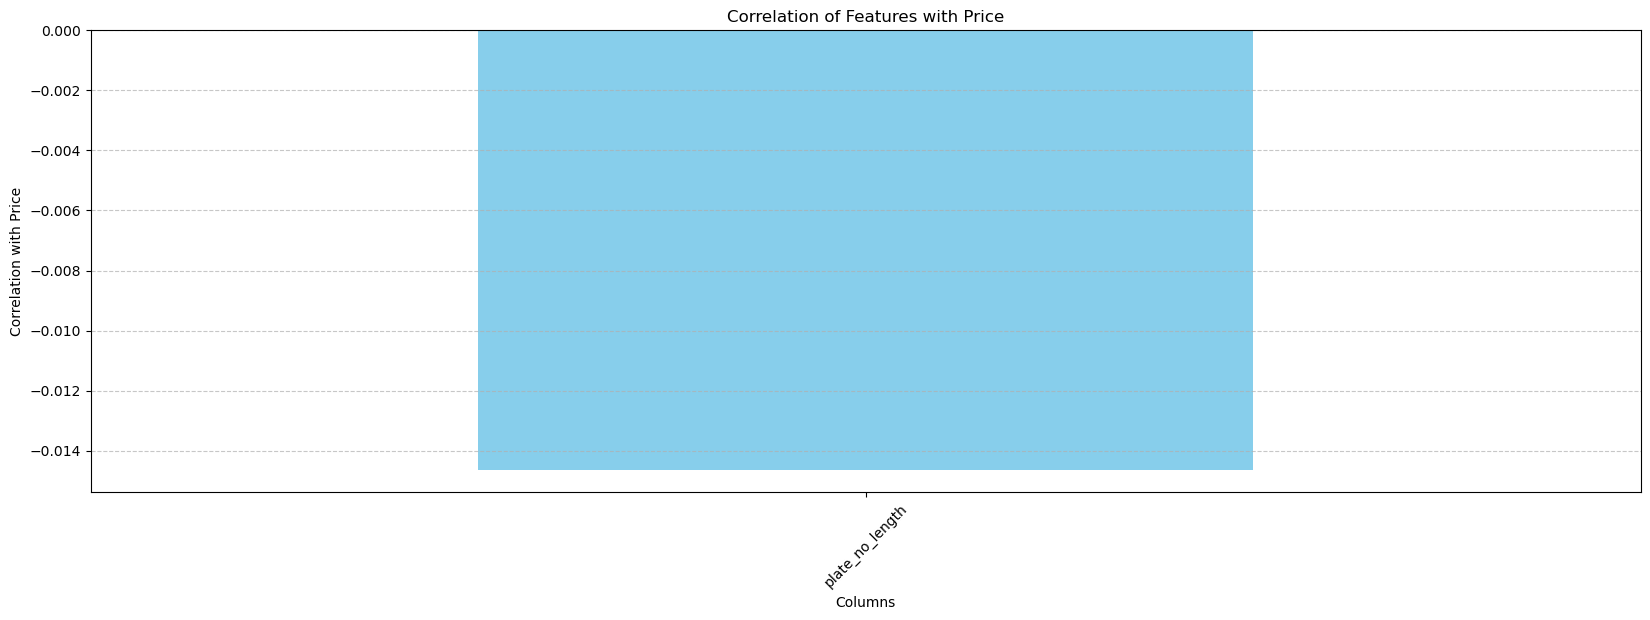

In [162]:
df_numeric = df.select_dtypes(include=['number'])  

correlation_matrix = df_numeric.corr()

price_correlation = correlation_matrix['price'].sort_values(ascending=False)

columns_to_plot = [col for col in price_correlation.index if col not in exclude_columns and col != 'price']

plt.figure(figsize=(20, 6))
price_correlation[columns_to_plot].plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Correlation with Price')
plt.title('Correlation of Features with Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


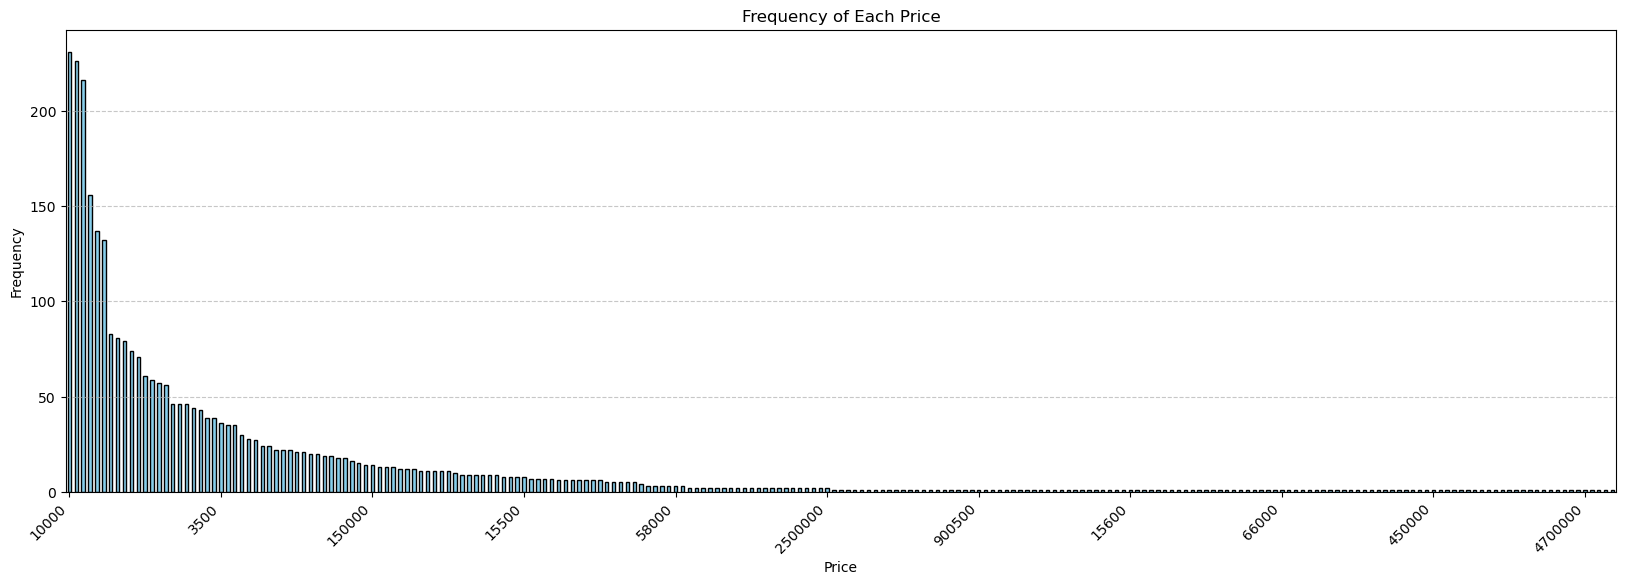

In [164]:

price_counts = df['price'].value_counts()
plt.figure(figsize=(20, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Price')  
plt.ylabel('Frequency') 
plt.title('Frequency of Each Price')

plt.xticks(rotation=45, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(ticks=range(0, len(price_counts), max(1, len(price_counts)//10)))

plt.show()


In [166]:
df.head()

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,...,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine
0,أ أ أ,A A A,أ,أ,أ,A,A,A,0,2000000,...,True,False,False,False,False,False,False,False,False,False
1,أ أ أ,A A A,أ,أ,أ,A,A,A,2116,7000,...,False,False,False,False,False,False,False,False,False,False
2,أ أ أ,A A A,أ,أ,أ,A,A,A,3309,13000,...,False,False,False,False,False,False,False,False,False,False
3,أ أ أ,A A A,أ,أ,أ,A,A,A,5561,9000,...,False,False,False,False,False,False,False,False,False,False
4,أ أ أ,A A A,أ,أ,أ,A,A,A,6932,5000,...,False,False,False,False,False,False,False,False,False,False


In [168]:
top_100_prices = df.nlargest(100, 'price')

In [170]:
top_100_prices

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,...,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine
2283,ه ك ن,N K H,ه,ك,ن,H,K,N,80,999999999999,...,False,False,False,False,False,False,False,False,False,False
2116,د ح ط,T J D,د,ح,ط,D,J,T,999,108446043404,...,False,False,False,False,False,False,False,False,False,False
2105,د ح ط,T J D,د,ح,ط,D,J,T,999,7643844543,...,False,False,False,False,False,False,False,False,False,False
2106,د ح ط,T J D,د,ح,ط,D,J,T,999,2484543484,...,False,False,False,False,False,False,False,False,False,False
2259,ب و ب,B U B,ب,و,ب,B,U,B,707,552318009,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738,ر ن ا,A N R,ر,ن,ا,R,N,A,7,200000,...,False,False,False,False,False,False,False,True,False,False
1078,ه ه ل,H H L,ه,ه,ل,H,H,L,3,190000,...,False,False,False,True,False,False,False,False,False,False
1204,د م م,D Z Z,د,م,م,D,Z,Z,3,180000,...,False,False,False,True,False,False,False,False,False,False
2834,د ن ى,V N D,د,ن,ى,D,N,V,2,180000,...,False,False,True,False,False,False,False,False,False,False


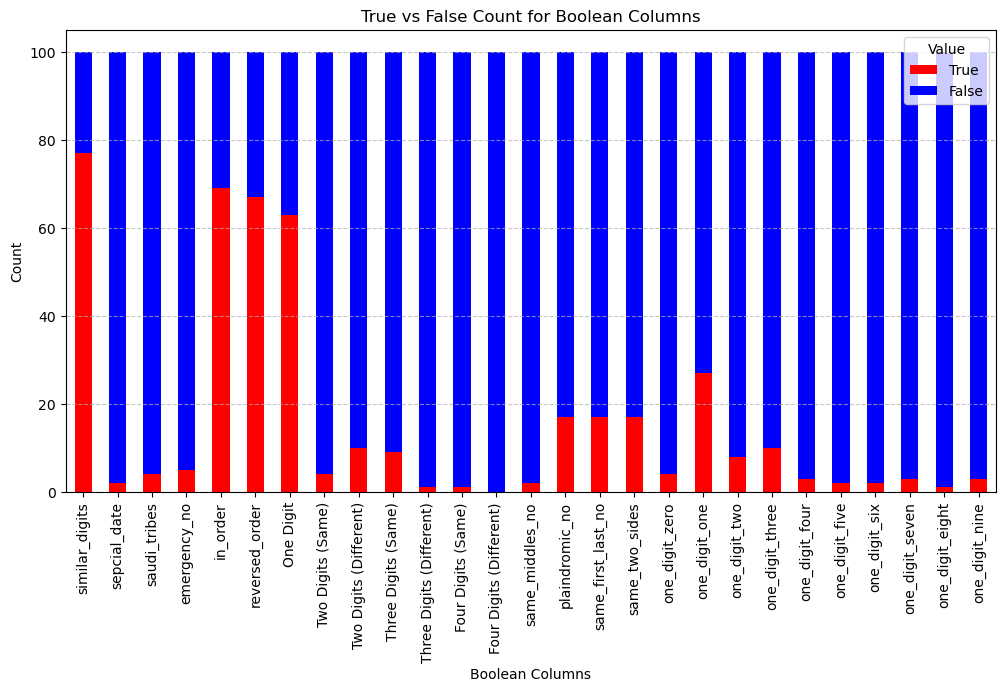

In [172]:
exclude_columns = ['char_ar', 'char_en', 'plate_no', 'price', 'rank', 'popularity']

# Filter the boolean columns
boolean_columns = [column for column in top_100_prices.columns if column not in exclude_columns and top_100_prices[column].dtype == 'bool']

# Create a new DataFrame to store the value counts for each boolean column
value_counts_df = pd.DataFrame()

# Get value counts for each boolean column and add it to the new DataFrame
for column in boolean_columns:
    value_counts_df[column] = top_100_prices[column].value_counts()

# Plot the value counts of all boolean columns in the same chart
value_counts_df.T.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'blue'])

plt.xlabel('Boolean Columns')
plt.ylabel('Count')
plt.title('True vs False Count for Boolean Columns')
plt.xticks(rotation=90)
plt.legend(title='Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [174]:
data = df[df['plate_no_length'] == 1]
data

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,...,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine
0,أ أ أ,A A A,أ,أ,أ,A,A,A,0,2000000,...,True,False,False,False,False,False,False,False,False,False
12,أ ب ق,A B G,أ,ب,ق,A,B,G,3,70000,...,False,False,False,True,False,False,False,False,False,False
35,أ م ل,A Z L,أ,م,ل,A,Z,L,2,85000,...,False,False,True,False,False,False,False,False,False,False
47,أ و س,A U S,أ,و,س,A,U,S,4,34000,...,False,False,False,False,True,False,False,False,False,False
71,ب ح م,B J Z,ب,ح,م,B,J,Z,2,50000,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,ق ح ك,K J G,ق,ح,ك,G,J,K,5,55000,...,False,False,False,False,False,True,False,False,False,False
2963,و ق ن,N G U,و,ق,ن,U,G,N,5,60000,...,False,False,False,False,False,True,False,False,False,False
3030,ا ن ق,G N A,ا,ن,ق,A,N,G,3,1000000,...,False,False,False,True,False,False,False,False,False,False
3031,ق ى ل,L V G,ق,ى,ل,G,V,L,8,40000,...,False,False,False,False,False,False,False,False,True,False


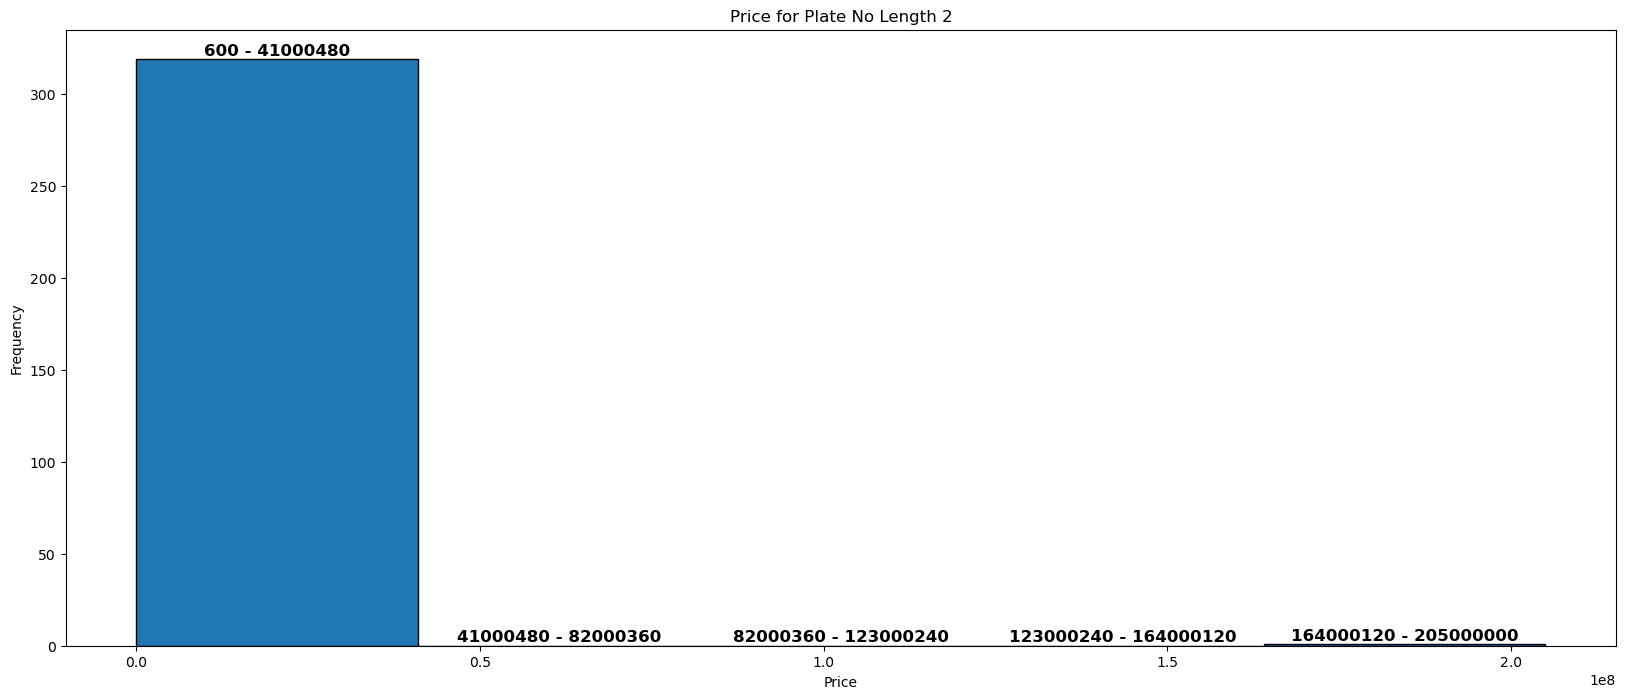

In [176]:
#Assuming your DataFrame is named 'df'
#Filter the data based on plate_no_length
data = df[df['plate_no_length'] == 1]

#Create the histogram for 'price' with a larger figure size
plt.figure(figsize=(20, 8))  # Adjust the size as needed

#Create the histogram
n, bins, patches = plt.hist(data['price'], bins=5, edgecolor='black')

#Adding title and labels
plt.title('Price for Plate No Length 2')
plt.xlabel('Price')
plt.ylabel('Frequency')

#Annotate the price values on top of each bar
for i in range(len(patches)):
    height = patches[i].get_height()  # Get the height of each bar (frequency)
    bin_center = (bins[i] + bins[i+1]) / 2  # Get the center of the bin
    price_label = f"{bins[i]:.0f} - {bins[i+1]:.0f}"  # Show price range
    plt.text(bin_center, height + 0.5, price_label, ha='center', va='bottom', fontsize=12, fontweight='bold')

#Show the plot
plt.show()